In [164]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import plotly.express as px

In [165]:
df = pd.read_csv('normalized_groups_data.csv')

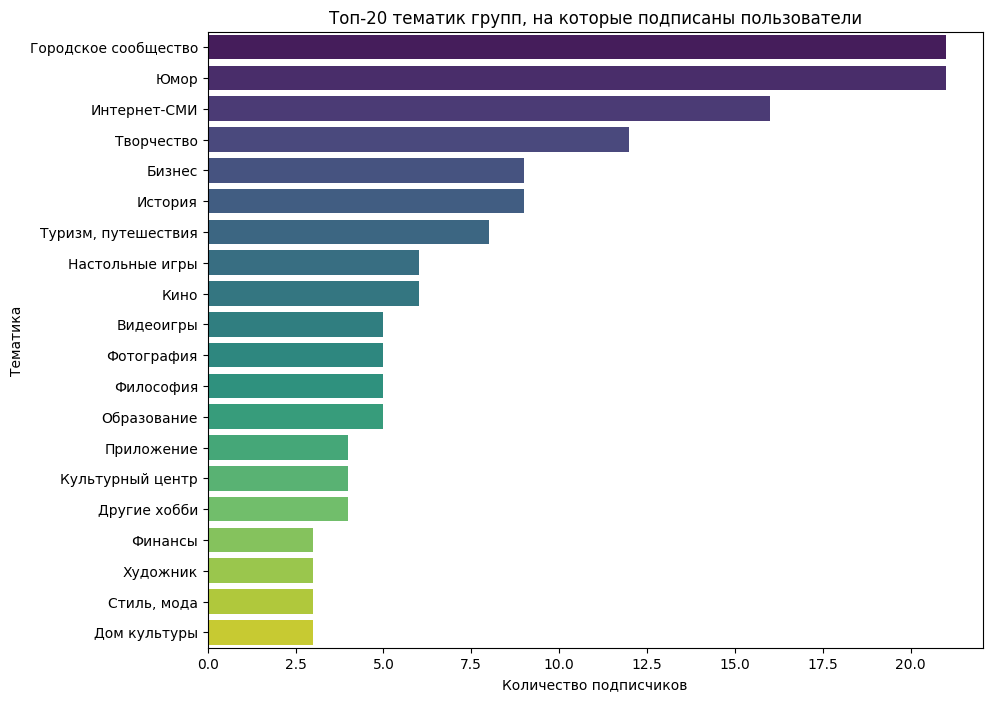

In [166]:
activity_counts = Counter(df['activity'].dropna())

activity_df = pd.DataFrame(activity_counts.items(), columns=['Activity', 'Count']).sort_values(by='Count', ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Activity', data=activity_df.head(20), palette='viridis')
plt.title('Топ-20 тематик групп, на которые подписаны пользователи')
plt.xlabel('Количество подписчиков')
plt.ylabel('Тематика')
plt.show()

In [167]:
import pandas as pd
import numpy as np

unique_activities = df['activity'].unique()

activity_matrix = pd.DataFrame(np.zeros((len(unique_activities), len(unique_activities))), index=unique_activities, columns=unique_activities)

for user_id in df['user_id'].unique():
    user_activities = df[df['user_id'] == user_id]['activity'].unique()
    for i, activity1 in enumerate(user_activities):
        for activity2 in user_activities[i + 1:]:
            activity_matrix.at[activity1, activity2] += 1
            activity_matrix.at[activity2, activity1] += 1  

print(activity_matrix)



                           Городское сообщество  Бизнес  Интернет-СМИ  \
Городское сообщество                        0.0     3.0           4.0   
Бизнес                                      3.0     0.0           2.0   
Интернет-СМИ                                4.0     2.0           0.0   
Политика                                    2.0     1.0           2.0   
Консалтинг, бизнес-услуги                   1.0     2.0           1.0   
...                                         ...     ...           ...   
Эротика                                     0.0     1.0           1.0   
Автосалон                                   0.0     1.0           1.0   
Тату-салон                                  0.0     1.0           1.0   
Объявления                                  0.0     1.0           1.0   
Часы                                        0.0     1.0           1.0   

                           Политика  Консалтинг, бизнес-услуги  \
Городское сообщество            2.0                      

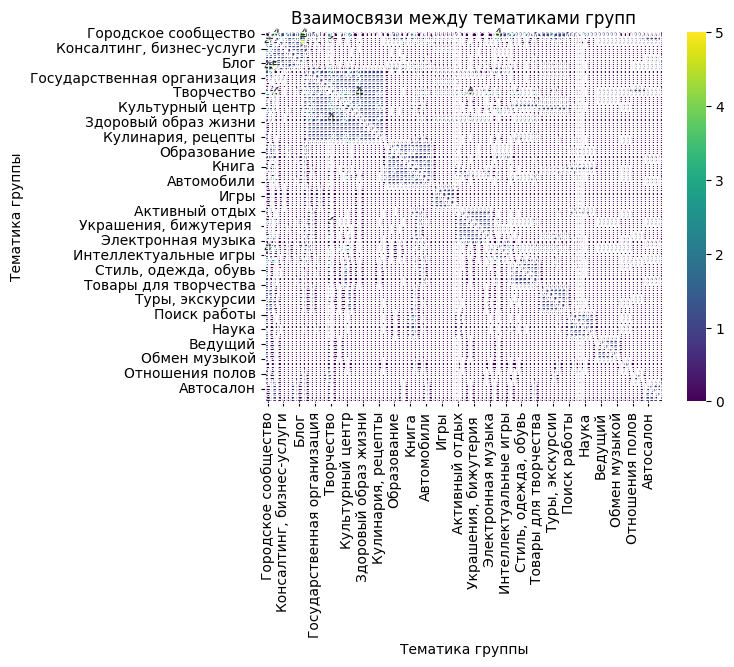

In [168]:
sns.heatmap(activity_matrix, annot=True, cmap="viridis")
plt.title('Взаимосвязи между тематиками групп')
plt.xlabel('Тематика группы')
plt.ylabel('Тематика группы')
plt.show()

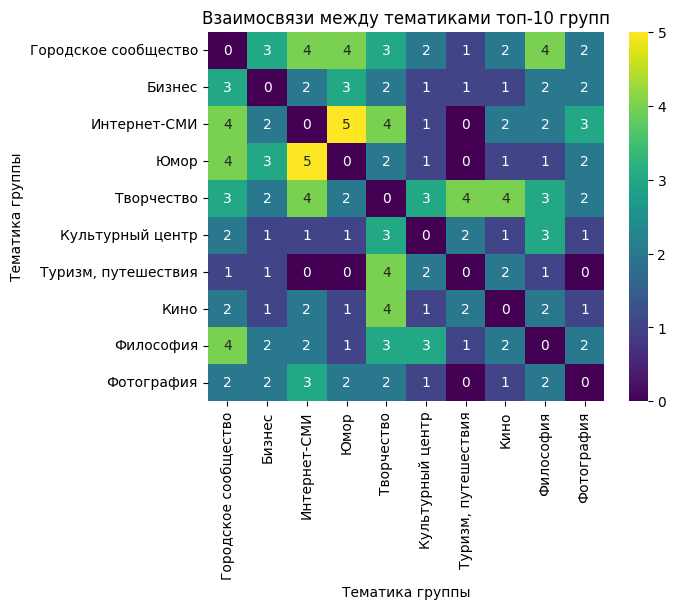

In [235]:
activity_popularity = df.groupby('activity')['user_id'].nunique().sort_values(ascending=False)

# Выбор топ N самых популярных тематик
top_activities = activity_popularity.head(10).index

# Фильтрация df для включения только топ N тематик
filtered_df = df[df['activity'].isin(top_activities)]

# Создание новой матрицы взаимосвязей только для топ N тематик
unique_activities = filtered_df['activity'].unique()
activity_matrix = pd.DataFrame(np.zeros((len(unique_activities), len(unique_activities))), index=unique_activities, columns=unique_activities)

for user_id in filtered_df['user_id'].unique():
    user_activities = filtered_df[filtered_df['user_id'] == user_id]['activity'].unique()
    for i, activity1 in enumerate(user_activities):
        for activity2 in user_activities[i + 1:]:
            activity_matrix.at[activity1, activity2] += 1
            activity_matrix.at[activity2, activity1] += 1  

# Визуализация матрицы взаимосвязей для топ N тематик
sns.heatmap(activity_matrix, annot=True, cmap="viridis")
plt.title('Взаимосвязи между тематиками топ-10 групп')
plt.xlabel('Тематика группы')
plt.ylabel('Тематика группы')
plt.show()


In [242]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('russian'))
custom_stop_words = [' ', 'Санкт-Петербург', '--', 'спб', 'питер', '"', 'Санкт-петербург', 'дубна', '``', "''", 'петербург', 'санкт-петербург', '—', 'барахолка']
stop_words.update(custom_stop_words)

def preprocess_text(text):
 
    text = text.lower()
    tokens = word_tokenize(text, language='russian')
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words]
    return tokens

df['processed_names'] = df['group_name'].apply(preprocess_text)

all_tokens = sum(df['processed_names'].tolist(), [])
word_freq = Counter(all_tokens)

most_common_words = word_freq.most_common(22)

freq_df = pd.DataFrame(most_common_words, columns=['ключевое слово', 'частота'])

fig = px.bar(freq_df, x='ключевое слово', y='частота', title='Топ-22 самых частых слов в названиях пабликов')
fig.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\динара\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\динара\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
words_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

words_df['Size'] = words_df['Frequency'].apply(lambda x: x * 10)  # Пример масштабирования

words_df['Color'] = words_df['Frequency']
fig = px.scatter(words_df, x='Word', y='Frequency',
                 size='Size', color='Color',
                 hover_name='Word', title='Интерактивное облако частот слов в названиях пабликов',
                 size_max=60, color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(xaxis_title="Слово",
                  yaxis_title="Частота",
                  coloraxis_colorbar=dict(title="Частота"))

fig.update_xaxes(tickangle=45)

fig.show()

In [171]:
df_posts = pd.read_csv('datamining.csv')
df_posts['time'] = pd.to_datetime(df_posts['time'])
df_posts.drop('date', axis=1, inplace=True)
pd.set_option('display.max_columns', None)
print(df_posts.head())
correlation_matrix = df_posts[['likes', 'comments', 'views', 'reposts']].corr()
print(correlation_matrix)

   likes  comments  views  reposts  \
0    121         5  15559       39   
1     15         0   1416        1   
2     20         1   1757        6   
3     35         0   2901       18   
4     10         4   1474        1   

                                                text                time  \
0  ❗ Добавлены два новых апскейлера — 2х и 4х. ❗\... 2023-10-19 06:09:06   
1                                      Кот и котенок 2023-12-31 21:05:00   
2  Персонажи "Гриффинов" как иконы Викторианской ... 2023-12-31 18:05:00   
3                                     Хомяк на сёрфе 2023-12-31 15:05:00   
4                                Лохнесское чудовище 2023-12-31 12:05:00   

   attachments  
0            3  
1            1  
2            6  
3            3  
4            1  
             likes  comments     views   reposts
likes     1.000000  0.491744  0.658321  0.674901
comments  0.491744  1.000000  0.341700  0.345027
views     0.658321  0.341700  1.000000  0.624122
reposts   0.6749

C:\Users\динара\AppData\Local\Temp\ipykernel_22520\524317305.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



C:\Users\динара\AppData\Local\Temp\ipykernel_22520\524317305.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



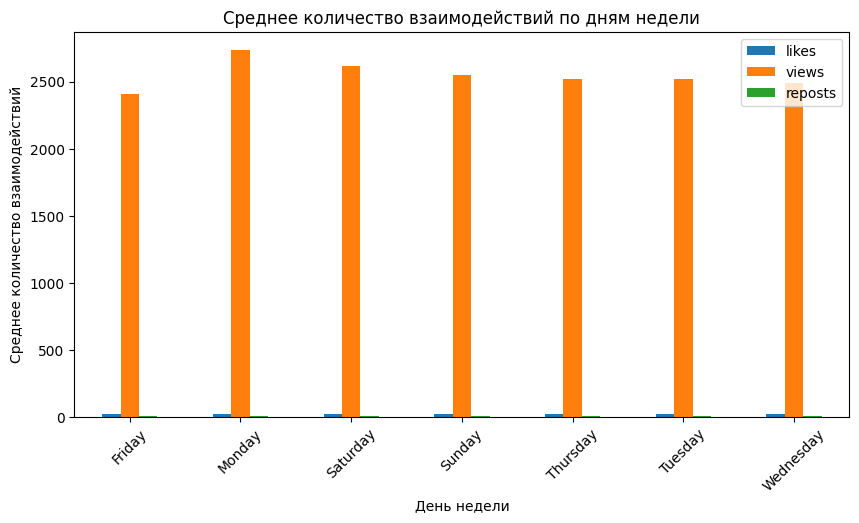

In [172]:
df_posts['day_of_week'] = df_posts['time'].dt.day_name()
df_posts['hour'] = df_posts['time'].dt.hour
weekly_stats = df_posts.groupby('day_of_week').mean()[['likes', 'views', 'reposts']]

hourly_stats = df_posts.groupby('hour').mean()[['likes', 'views', 'reposts']]  # Группировка по часу

weekly_stats.plot(kind='bar', figsize=(10, 5))
plt.title('Среднее количество взаимодействий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество взаимодействий')
plt.xticks(rotation=45)
plt.show()

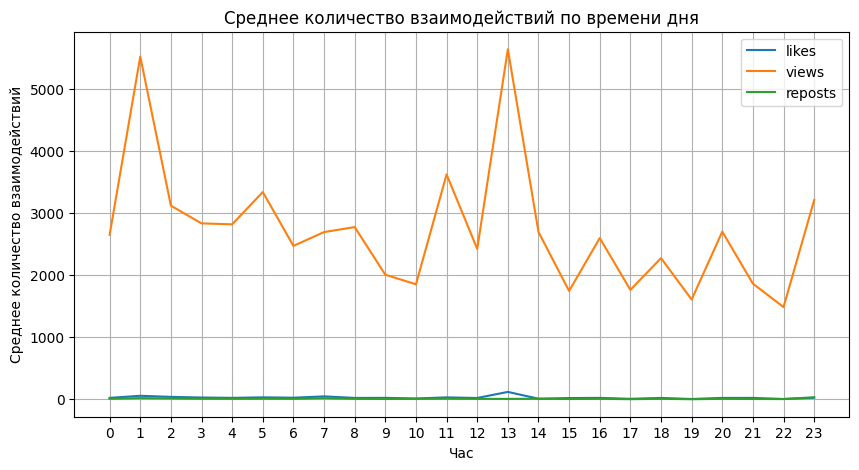

In [173]:
hourly_stats.plot(kind='line', figsize=(10, 5))
plt.title('Среднее количество взаимодействий по времени дня')
plt.xlabel('Час')
plt.ylabel('Среднее количество взаимодействий')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

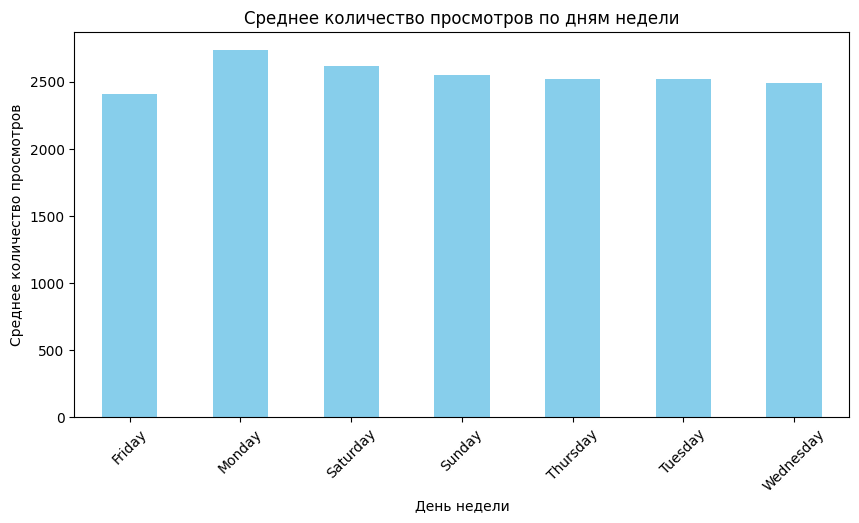

<Figure size 1000x500 with 0 Axes>

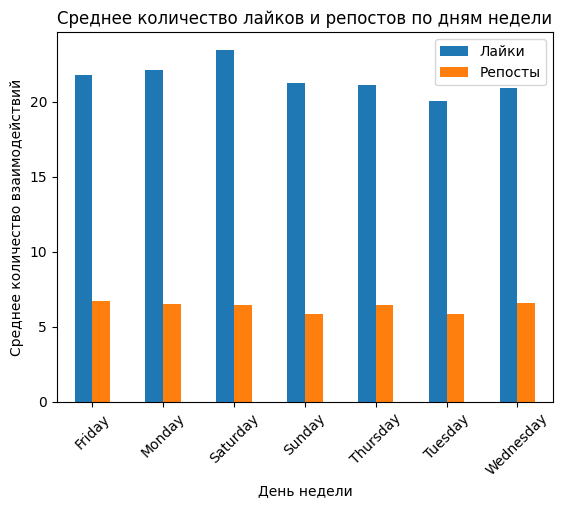

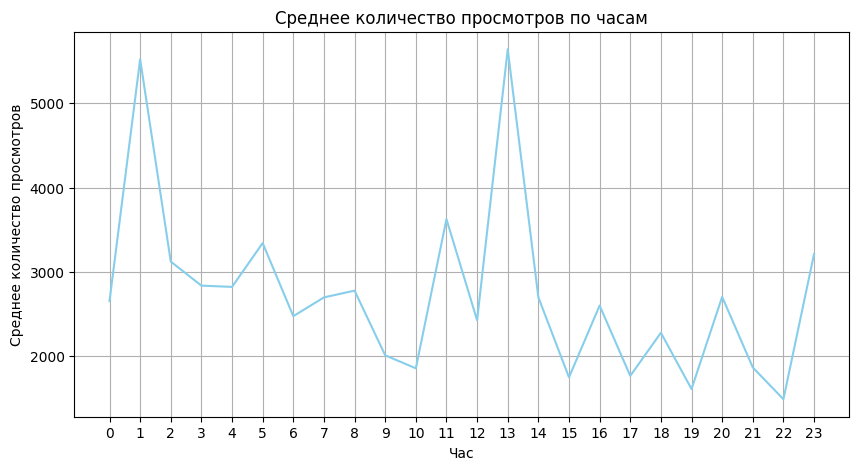

<Figure size 1000x500 with 0 Axes>

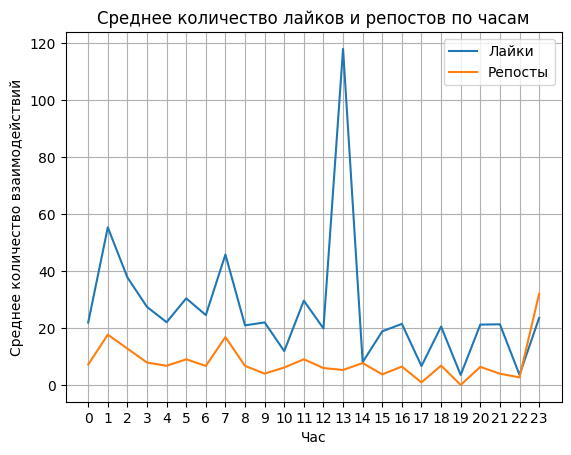

In [237]:
import matplotlib.pyplot as plt

# График динамики количества просмотров по дням недели
plt.figure(figsize=(10, 5))
weekly_stats['views'].plot(kind='bar', color='skyblue')
plt.title('Среднее количество просмотров по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество просмотров')
plt.xticks(rotation=45)
plt.show()

# График динамики количества лайков и комментариев по дням недели
plt.figure(figsize=(10, 5))
weekly_stats[['likes', 'reposts']].plot(kind='bar')
plt.title('Среднее количество лайков и репостов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество взаимодействий')
plt.xticks(rotation=45)
plt.legend(['Лайки', 'Репосты'])
plt.show()

# График динамики количества просмотров по часам
plt.figure(figsize=(10, 5))
hourly_stats['views'].plot(kind='line', color='skyblue')
plt.title('Среднее количество просмотров по часам')
plt.xlabel('Час')
plt.ylabel('Среднее количество просмотров')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# График динамики количества лайков и комментариев по часам
plt.figure(figsize=(10, 5))
hourly_stats[['likes', 'reposts']].plot(kind='line')
plt.title('Среднее количество лайков и репостов по часам')
plt.xlabel('Час')
plt.ylabel('Среднее количество взаимодействий')
plt.xticks(range(0, 24))
plt.legend(['Лайки', 'Репосты'])
plt.grid(True)
plt.show()


C:\Users\динара\AppData\Local\Temp\ipykernel_22520\677388085.py:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\динара\AppData\Local\Temp\ipykernel_22520\677388085.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



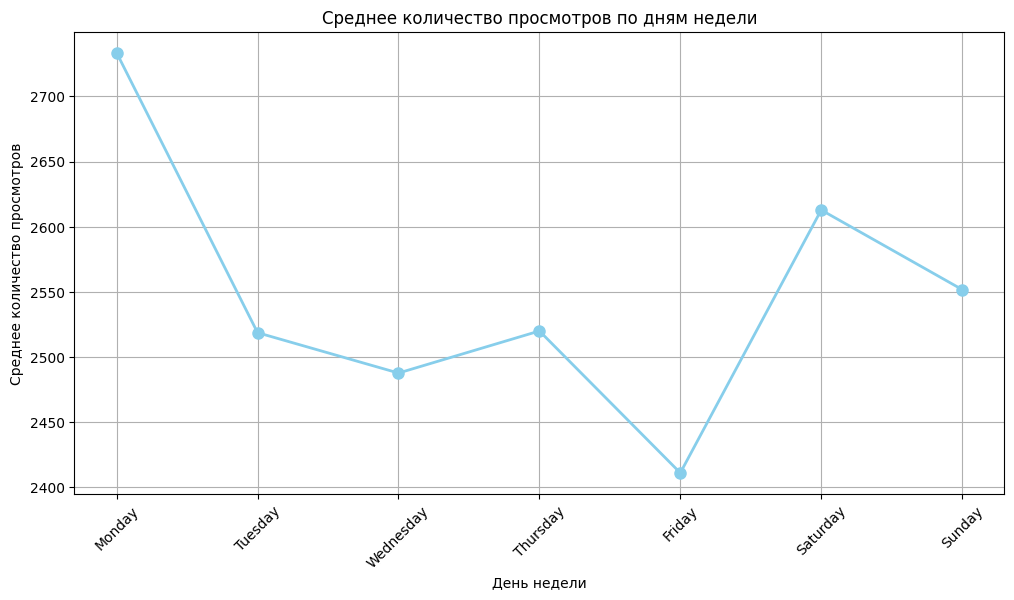

<Figure size 1200x600 with 0 Axes>

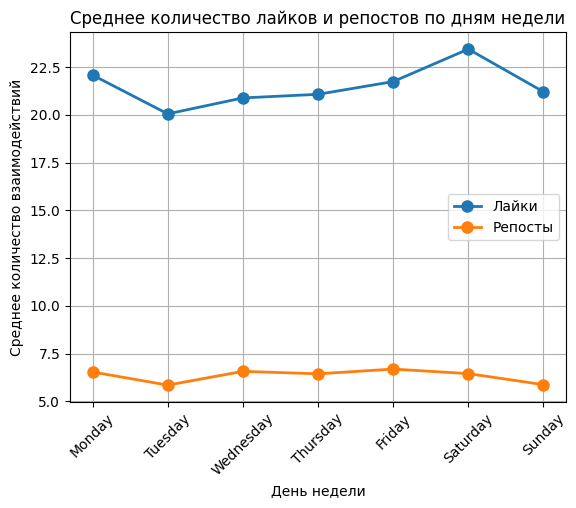

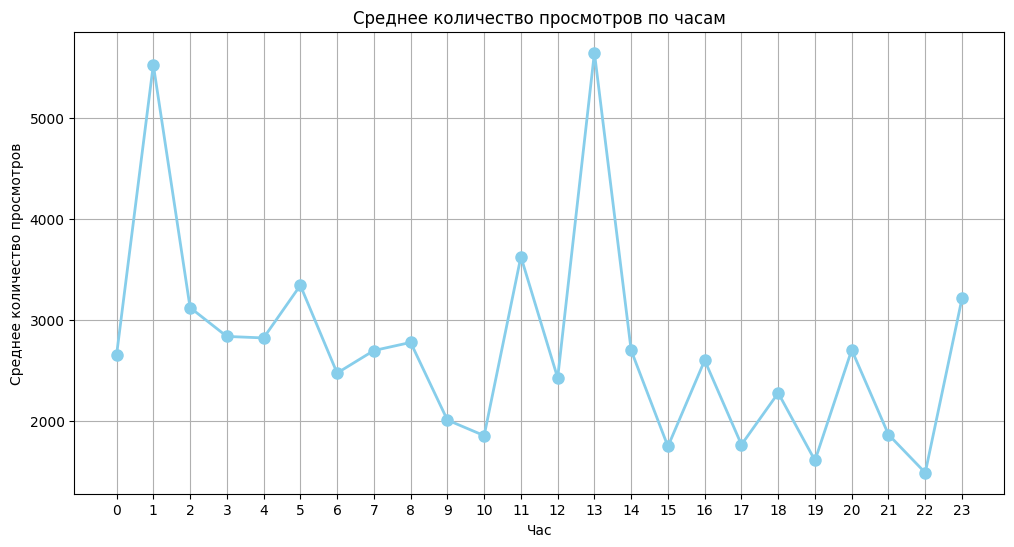

<Figure size 1200x600 with 0 Axes>

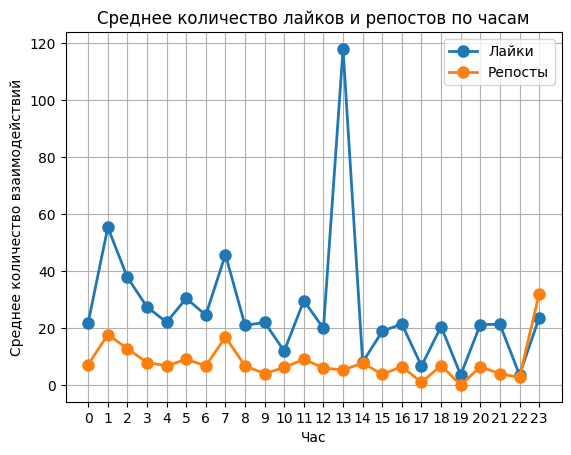

In [238]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Предполагается, что df_posts уже содержит колонки 'day_of_week' и 'hour', а также 'likes', 'views', и 'reposts'

# Преобразование 'day_of_week' из строкового типа в категориальный для сохранения порядка дней
df_posts['day_of_week'] = pd.Categorical(df_posts['day_of_week'], categories=
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True)

# Пересчет статистик
weekly_stats = df_posts.groupby('day_of_week').mean()[['likes', 'views', 'reposts']]
hourly_stats = df_posts.groupby('hour').mean()[['likes', 'views', 'reposts']]

# График динамики количества просмотров по дням недели
plt.figure(figsize=(12, 6))
weekly_stats['views'].plot(kind='line', marker='o', color='skyblue', linewidth=2, markersize=8)
plt.title('Среднее количество просмотров по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество просмотров')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# График динамики количества лайков и репостов по дням недели
plt.figure(figsize=(12, 6))
weekly_stats[['likes', 'reposts']].plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Среднее количество лайков и репостов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество взаимодействий')
plt.xticks(rotation=45)
plt.legend(['Лайки', 'Репосты'])
plt.grid(True)
plt.show()

# График динамики количества просмотров по часам
plt.figure(figsize=(12, 6))
hourly_stats['views'].plot(kind='line', marker='o', color='skyblue', linewidth=2, markersize=8)
plt.title('Среднее количество просмотров по часам')
plt.xlabel('Час')
plt.ylabel('Среднее количество просмотров')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True)
plt.show()

# График динамики количества лайков и репостов по часам
plt.figure(figsize=(12, 6))
hourly_stats[['likes', 'reposts']].plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Среднее количество лайков и репостов по часам')
plt.xlabel('Час')
plt.ylabel('Среднее количество взаимодействий')
plt.xticks(np.arange(0, 24, 1))
plt.legend(['Лайки', 'Репосты'])
plt.grid(True)
plt.show()


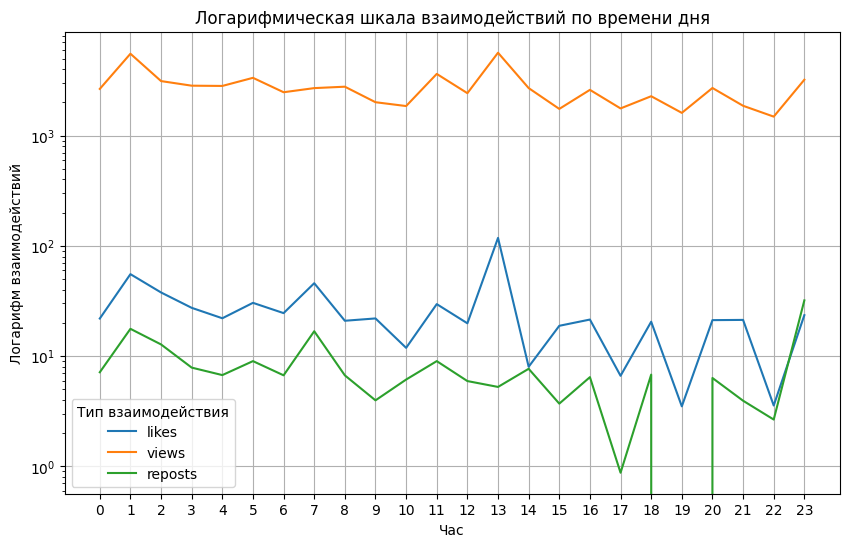

In [174]:
hourly_stats.plot(kind='line', figsize=(10, 6), logy=True)
plt.title('Логарифмическая шкала взаимодействий по времени дня')
plt.xlabel('Час')
plt.ylabel('Логарифм взаимодействий')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Тип взаимодействия')
plt.show()


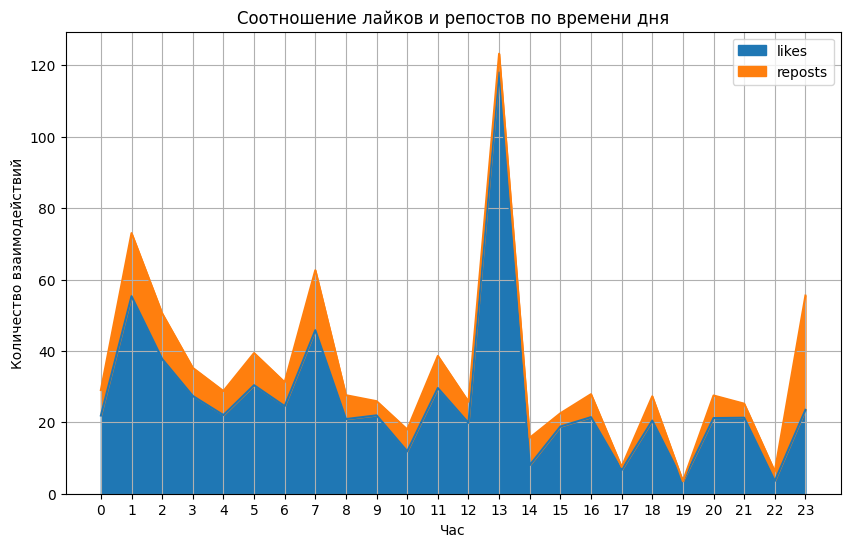

In [175]:
hourly_stats[['likes', 'reposts']].plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Соотношение лайков и репостов по времени дня')
plt.xlabel('Час')
plt.ylabel('Количество взаимодействий')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


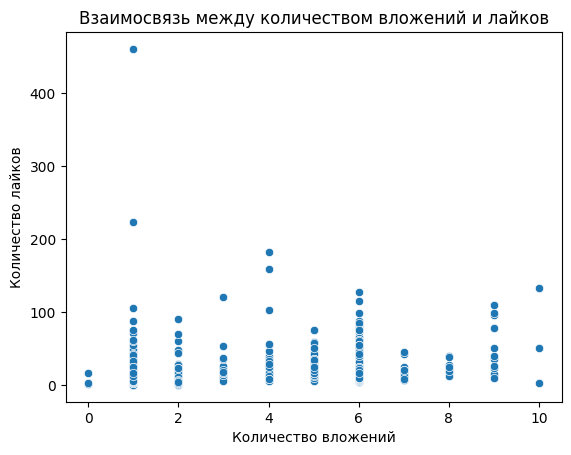

In [176]:
sns.scatterplot(data=df_posts, x='attachments', y='likes')
plt.title('Взаимосвязь между количеством вложений и лайков')
plt.xlabel('Количество вложений')
plt.ylabel('Количество лайков')
plt.show()

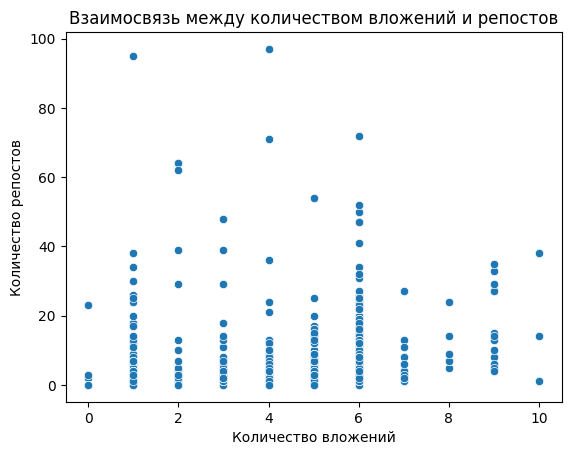

In [177]:
sns.scatterplot(data=df_posts, x='attachments', y='reposts')
plt.title('Взаимосвязь между количеством вложений и репостов')
plt.xlabel('Количество вложений')
plt.ylabel('Количество репостов')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\динара\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\динара\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


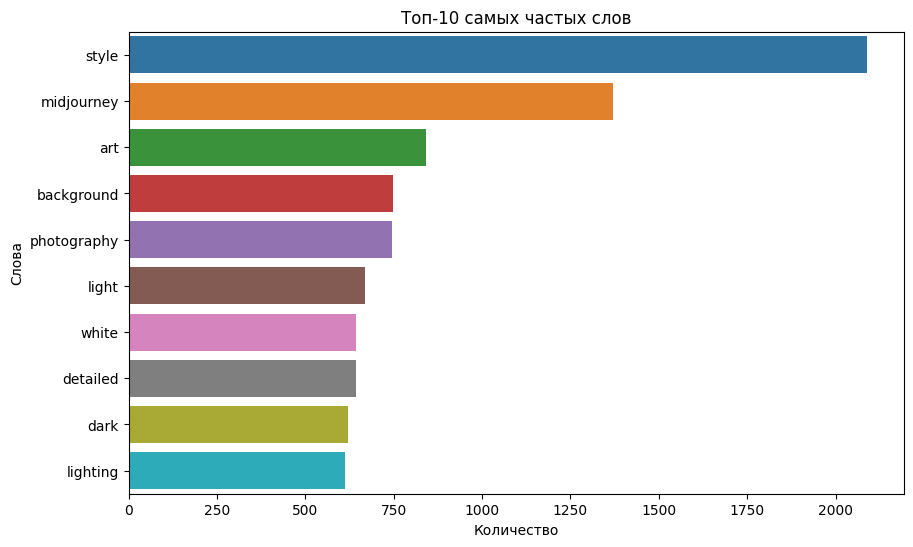

In [178]:
nltk.download('stopwords')
nltk.download('punkt')
df_posts['text'] = df_posts['text'].astype(str)
stop_words = set(stopwords.words('english') + list(string.punctuation) + stopwords.words('russian'))

stop_words.update(custom_stop_words)

def clean_text(text):
    if pd.isna(text):
        return []
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return filtered_words

df_posts['cleaned_text'] = df_posts['text'].astype(str).apply(clean_text)

all_words = sum(df_posts['cleaned_text'].tolist(), [])

word_freq = Counter(all_words)
most_common_words = word_freq.most_common(10)

def clean_tokenize(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return filtered_tokens

words = [word[0] for word in most_common_words]
counts = [count[1] for count in most_common_words]

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('Топ-10 самых частых слов')
plt.xlabel('Количество')
plt.ylabel('Слова')
plt.show()


In [205]:

user_data_with_groups_activities_1 = pd.read_csv('user_data_with_groups_activities_1.csv')
user_data_with_groups_activities_2 = pd.read_csv('user_data_with_groups_activities_2.csv')
user_data_with_groups_activities_3 = pd.read_csv('user_data_with_groups_activities_3.csv')
user_data_with_groups_activities_4 = pd.read_csv('user_data_with_groups_activities_4.csv')
user_data_with_groups_activities_5 = pd.read_csv('user_data_with_groups_activities_5.csv')
user_data_with_groups_activities_6 = pd.read_csv('user_data_with_groups_activities_6.csv')

combined_df = pd.concat([
    user_data_with_groups_activities_1,
    user_data_with_groups_activities_2,
    user_data_with_groups_activities_3,
    user_data_with_groups_activities_4,
    user_data_with_groups_activities_5,
    user_data_with_groups_activities_6
], ignore_index=True)

print(combined_df.head())
print(combined_df.shape)

  sex       bdate              city  \
0   м         NaN   Санкт-Петербург   
1   м   31.5.1986   Санкт-Петербург   
2   ж         NaN               NaN   
3   м         NaN               NaN   
4   ж  29.10.1985  Великий Новгород   

                                   groups_activities  
0                                                NaN  
1  Городское сообщество; Бизнес; Интернет-СМИ; По...  
2                                                NaN  
3                                                NaN  
4  Реклама; Приложение; Туризм, путешествия; Диза...  
(6000, 4)


In [206]:
from datetime import datetime

def calculate_age(bdate):
    if pd.isna(bdate):
        return None
    today = datetime.today()
    bdate = datetime.strptime(bdate, '%d.%m.%Y')
    return today.year - bdate.year - ((today.month, today.day) < (bdate.month, bdate.day))

def clean_tokenize_activities(text):
    stop_words = set(stopwords.words('russian'))
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalpha() and word not in stop_words]

combined_df['age'] = combined_df['bdate'].apply(calculate_age)
combined_df['activities_tokens'] = combined_df['groups_activities'].astype(str).apply(clean_tokenize_activities)
combined_df = combined_df.dropna()

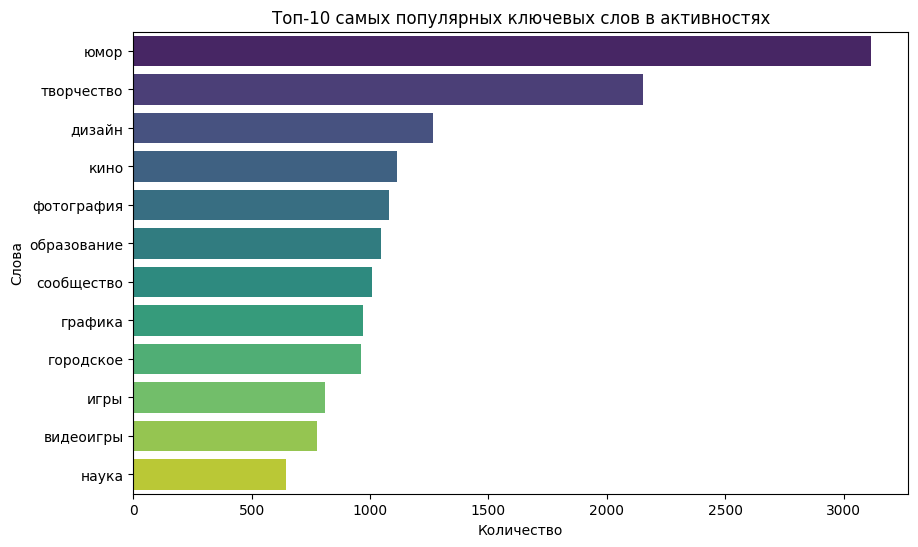

In [207]:
all_words = sum(combined_df['activities_tokens'].tolist(), [])

# Подсчет частоты каждого слова
word_freq = Counter(all_words)

# Получение наиболее часто встречающихся слов
most_common_words = word_freq.most_common(12)

# Разделение на слова и их частоты
words, counts = zip(*most_common_words)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Топ-10 самых популярных ключевых слов в активностях')
plt.xlabel('Количество')
plt.ylabel('Слова')
plt.show()

Медианный возраст участников сообщества : 36.0


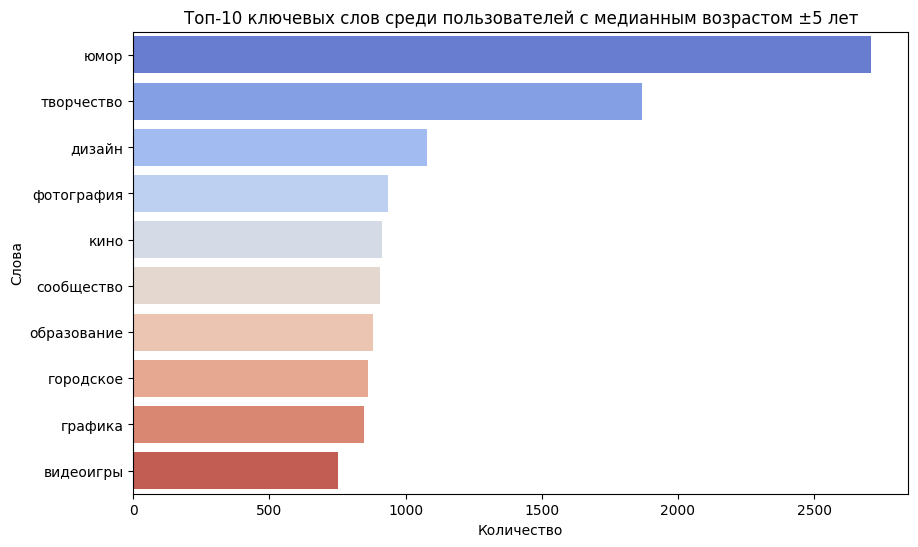

In [192]:
median_age = combined_df['age'].median()
print(f'Медианный возраст участников сообщества : {median_age}')

age_range = combined_df[(combined_df['age'] >= median_age - 5) & (combined_df['age'] <= median_age + 5)]

words_in_age_range = sum(age_range['activities_tokens'].tolist(), [])

word_freq_age_range = Counter(words_in_age_range)

most_common_words_age_range = word_freq_age_range.most_common(10)

words_age_range, counts_age_range = zip(*most_common_words_age_range)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts_age_range), y=list(words_age_range), palette='coolwarm')
plt.title(f'Топ-10 ключевых слов среди пользователей с медианным возрастом ±5 лет')
plt.xlabel('Количество')
plt.ylabel('Слова')
plt.show()


In [209]:
import plotly.graph_objects as go

# Создание данных для 3D столбчатого графика
trace = go.Bar(
    x=list(words_age_range),  # Ключевые слова
    y=list(counts_age_range),  # Количество упоминаний
    marker=dict(color=list(counts_age_range), colorscale='Viridis', line=dict(color='rgb(8,48,107)', width=1.5)),
    opacity=0.6
)

# Создание макета графика
layout = go.Layout(
    title=f'Топ-10 ключевых слов среди пользователей с медианным возрастом ±5 лет',
    xaxis=dict(title='Слова'),
    yaxis=dict(title='Количество'),
)

# Создание фигуры и добавление данных
fig = go.Figure(data=[trace], layout=layout)

# Добавление 3D эффекта
fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers'))

# Отображение графика
fig.show()


In [241]:
import plotly.graph_objects as go

# Подготовка данных
all_words = sum(combined_df['activities_tokens'].tolist(), [])
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(11)  # Берем топ-10 для примера

words, counts = zip(*most_common_words)

# Создание графика
fig = go.Figure(data=[
    go.Bar(
        x=list(words),  # Ключевые слова
        y=list(counts),  # Количество упоминаний
        marker=dict(color=list(counts), colorscale='Viridis', line=dict(color='rgb(8,48,107)', width=1.5)),
        opacity=0.6
    )
])

# Настройка макета графика
fig.update_layout(
    title='Топ-10 самых популярных ключевых слов в активностях',
    xaxis_title='Слова',
    yaxis_title='Количество',
    
)

# Отображение графика
fig.show()


Самый популярный город: Москва


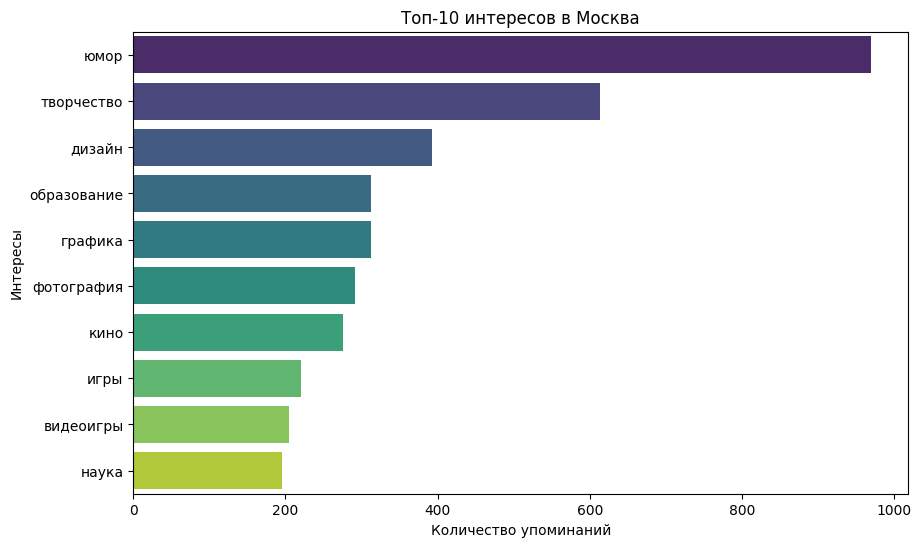

In [196]:
most_popular_city = combined_df['city'].value_counts().idxmax()
print(f"Самый популярный город: {most_popular_city}")
df_popular_city = combined_df[combined_df['city'] == most_popular_city]
all_words = sum(df_popular_city['activities_tokens'].tolist(), [])

# Подсчитываем частоту каждого слова
word_freq = Counter(all_words)

# Получаем наиболее часто встречающиеся слова
most_common_words = word_freq.most_common(10)

# Разделяем слова и их частоты
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title(f'Топ-10 интересов в {most_popular_city}')
plt.xlabel('Количество упоминаний')
plt.ylabel('Интересы')
plt.show()

In [203]:
df_male = combined_df[combined_df['sex'] == 'м']
df_female = combined_df[combined_df['sex'] == 'ж']

male_interests = sum(df_male['activities_tokens'].tolist(), [])
female_interests = sum(df_female['activities_tokens'].tolist(), [])

male_freq = Counter(male_interests)
female_freq = Counter(female_interests)

N = 10
top_male_interests = male_freq.most_common(N)
top_female_interests = female_freq.most_common(N)

data = {
    'Interest': [x[0] for x in top_male_interests],
    'Male': [x[1] for x in top_male_interests],
    'Female': [female_freq[x[0]] for x in top_male_interests]  # Сопоставляем женские частоты с мужскими интересами
}

df_interests = pd.DataFrame(data)

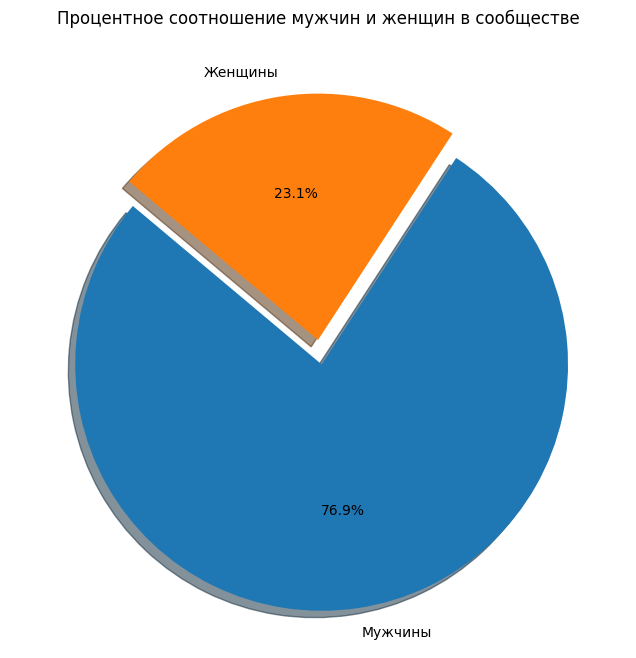

In [243]:
import matplotlib.pyplot as plt

# Подсчет количества мужчин и женщин
num_males = len(df_male)
num_females = len(df_female)
total = num_males + num_females

# Расчет процентного соотношения
percent_females = (num_females / total) * 100
percent_males = (num_males / total) * 100

# Подготовка данных для визуализации
labels = ['Мужчины', 'Женщины']
sizes = [percent_males, percent_females]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0)  # небольшой отступ для первого кусочка

# Визуализация
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Процентное соотношение мужчин и женщин в сообществе')
plt.show()


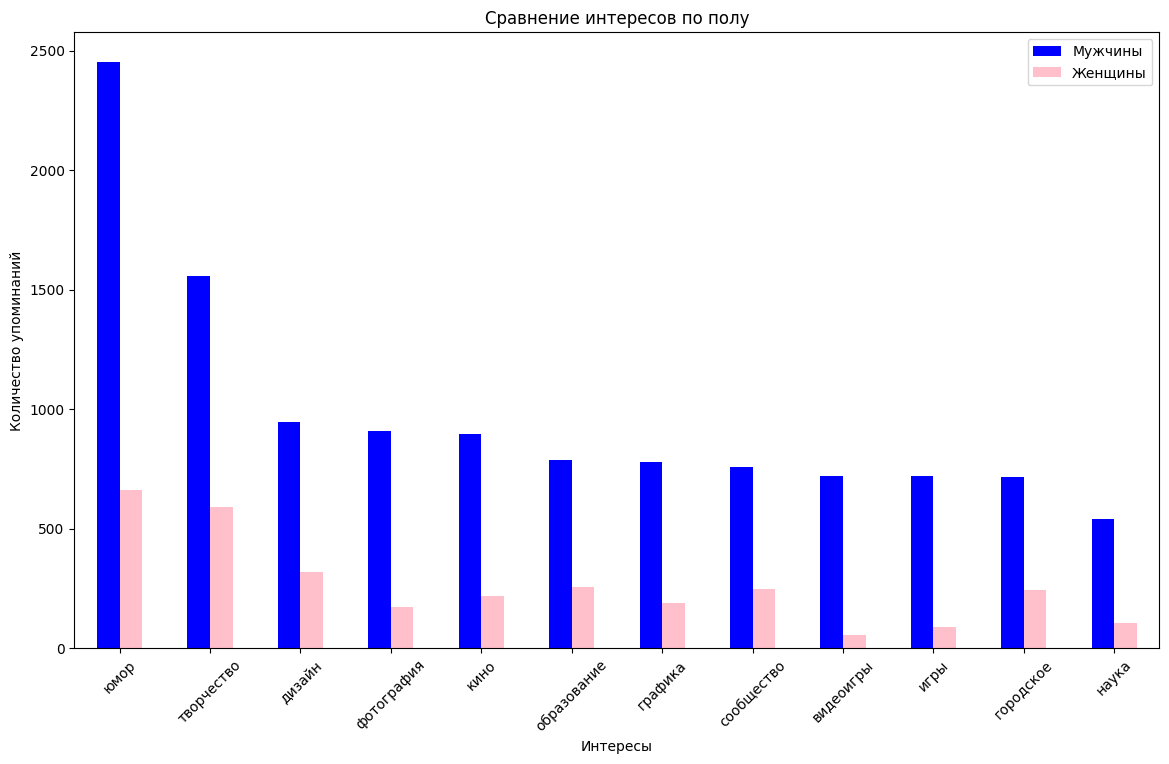

In [204]:
df_interests.plot(x='Interest', kind='bar', figsize=(14, 8), color=['blue', 'pink'])
plt.title('Сравнение интересов по полу')
plt.xlabel('Интересы')
plt.ylabel('Количество упоминаний')
plt.xticks(rotation=45)
plt.legend(['Мужчины', 'Женщины'])
plt.show()

In [233]:
career_df = pd.read_csv('user_data_with_groups_activities_careers.csv')
career_df['careers'] = career_df['careers'].astype(str)
career_df['careers'] = career_df['careers'].dropna()

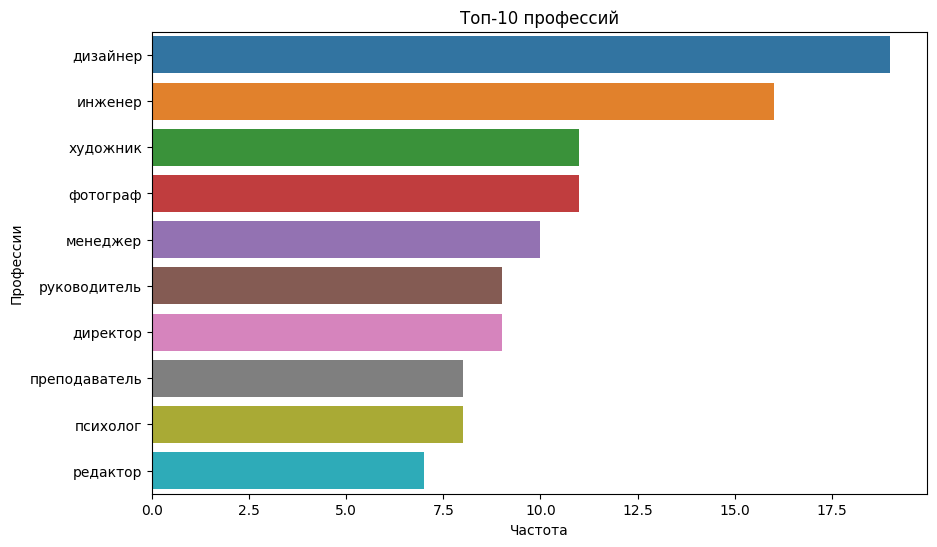

In [251]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Определение стоп-слов (включая знаки пунктуации)
stop_words = set(stopwords.words('russian') + list(string.punctuation))
custom_stop_words = ['nan', 'ведущий', 'старший', 'отдела', 'специалист']
stop_words.update(custom_stop_words)


# Функция для очистки и токенизации текста
def clean_tokenize(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Применение функции к колонке 'careers'
career_df['cleaned_careers'] = career_df['careers'].apply(clean_tokenize)

# Объединение всех токенов в один список
all_tokens = sum(career_df['cleaned_careers'].tolist(), [])

# Подсчет частоты слов
word_freq = Counter(all_tokens)

# Получение наиболее часто встречающихся слов
most_common_words = word_freq.most_common(10)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words])
plt.title('Топ-10 профессий')
plt.xlabel('Частота')
plt.ylabel('Профессии')
plt.show()


In [234]:
stop_words = set(stopwords.words('russian'))  

custom_stop_words = ['по', 'продажам', 'кастомноеСлово3']
stop_words.update(custom_stop_words)
  # Замена NaN на пустую строку

# Очистка и токенизация данных о карьере
def clean_and_tokenize(career_text):
    tokens = word_tokenize(career_text.lower())
    words = [word for word in tokens if word.isalpha()]
    return words

# Применение функции очистки и токенизации
career_df['cleaned_careers'] = career_df['careers'].apply(clean_and_tokenize)

# Объединение всех токенов в один список
all_tokens = sum(career_df['cleaned_careers'], [])

# Подсчет частоты слов
word_freq = Counter(all_tokens)

# Получение наиболее часто встречающихся слов
most_common_words = word_freq.most_common(10)

# Визуализация
plt.figure(figsize=(10, 8))
sns.barplot(x=list(zip(*most_common_words))[1], y=list(zip(*most_common_words))[0])
plt.title('Топ-10 профессий')
plt.xlabel('Частота')
plt.ylabel('Профессии')
plt.show()

AttributeError: 'bool' object has no attribute 'all'

<Figure size 1000x800 with 0 Axes>